# Open data from Taipei City Gov
* http://www.dot.gov.taipei/ct.asp?xItem=3167481&CtNode=44829&mp=117001
* Youbike http://opendata.dot.taipei.gov.tw/opendata/gwjs_cityhall.json
* Fields http://www.dot.gov.taipei/public/mmo/dot/YouBike%E5%BE%AE%E7%AC%91%E5%96%AE%E8%BB%8A%E4%BB%8B%E6%8E%A5%E8%AA%AA%E6%98%8E%E6%96%87%E4%BB%B6.pdf
    * mday: yyyyMMddhhmmss
    * tot: total 
    * sbi: stop bicycle
* Time processing
    * http://fcamel-life.blogspot.tw/2010/11/python.html

In [12]:
import urllib2
import json
import time
import numpy
t = time.time()
now_str = time.strftime('%y%m%d%H%M', time.localtime(t))
response = urllib2.urlopen('http://opendata.dot.taipei.gov.tw/opendata/gwjs_cityhall.json')
data = json.load(response)
f = open('data/youbike/%s.json'%(now_str), 'wb')
json.dump(data, f)
f.close()


In [2]:
print data['retVal'][0:1]

[{u'sip': u'10.7.0.11', u'vtyp': u'1', u'sareaen': u'Xinyi Dist.', u'sna': u'\u6377\u904b\u5e02\u653f\u5e9c\u7ad9(3\u865f\u51fa\u53e3)', u'aren': u'The S.W. side of Road Zhongxiao East Road & Road Chung Yan.', u'sno': u'0001', u'bemp': u'176', u'mday': u'20150407005259', u'nbcnt': u'0', u'sv': u'1', u'tot': u'180', u'snaen': u'MRT Taipei City Hall Stataion(Exit 3)-2', u'iid': u'339', u'ar': u'\u5fe0\u5b5d\u6771\u8def/\u677e\u4ec1\u8def(\u6771\u5357\u5074)', u'act': u'1', u'lat': u'25.0408578889', u'lng': u'121.567904444', u'sbi': u'1', u'sarea': u'\u4fe1\u7fa9\u5340', u'sd': u'20000101000000'}]


# Merge multiple json files

In [3]:
alldata = json.load(open('data/merged_youbike_list.json', 'r'))

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
times, sbis, tots, pers = [], [], [], []
for tdata in alldata:
    sbi, tot, per = 0.0, 0.0, 0.0
    times.append(tdata[0]['mday'])
    for site in tdata:
        sbi += int(site['sbi'])
        tot += int(site['tot'])
    per = sbi/float(tot)
    sbis.append(sbi)
    tots.append(tot)
    pers.append(per)
for i in range(len(sbis)):
    print "%s\t%d\t%d\t%.2f"%(times[i][:-2], sbis[i], tots[i], pers[i])


201503130001	4007	12524	0.32
201503130007	4020	12524	0.32
201503130010	4036	12524	0.32
201503130016	4046	12524	0.32
201503130021	4085	12524	0.33
201503130025	4076	12524	0.33
201503130031	4102	12524	0.33
201503130037	4163	12524	0.33
201503130040	4174	12524	0.33
201503130045	4202	12524	0.34
201503130049	4197	12524	0.34
201503130055	4165	12524	0.33
201503130101	4233	12524	0.34
201503130104	4224	12524	0.34
201503130110	4239	12524	0.34
201503130116	4282	12524	0.34
201503130119	4291	12524	0.34
201503130125	4301	12524	0.34
201503130131	4307	12524	0.34
201503130134	4317	12524	0.34
201503130140	4341	12524	0.35
201503130146	4374	12524	0.35
201503130149	4402	12524	0.35
201503130155	4410	12524	0.35
201503130159	4434	12524	0.35
201503130203	4443	12524	0.35
201503130210	4440	12524	0.35
201503130216	4460	12524	0.36
201503130219	4462	12524	0.36
201503130226	4470	12524	0.36
201503130232	4474	12524	0.36
201503130235	4466	12524	0.36
201503130241	4482	12524	0.36
201503130247	4490	12524	0.36
201503130250	4

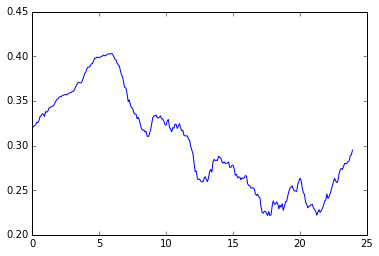

In [5]:
persx = []
for i in range(len(pers)):
    persx.append(i/12.0)
plt.plot(persx, pers)
plt.show()

In [24]:
def color_red_blue(ctr, reverse=False):
    hr=hex(int(ctr*255))
    hb=hex(255-int(ctr*255))
    if len(hr)==3:
        hr='0'+hr[2:]
    else:
        hr=hr[2:]
    if len(hb)==3:
        hb='0'+hb[2:]
    else:
        hb=hb[2:]
    if reverse:
        c='#'+hb+"00"+hr
    else:
        c='#'+hr+"00"+hb
    return c

In [14]:
site_dict = {}
for tdata in alldata:
    for site in tdata:
        site_dict.setdefault(site['sna'], [])
        site_dict[site['sna']].append(int(site['sbi']))
print len(site_dict)

272


In [15]:
site_total = {}
for site in alldata[0]:
    site_total[site['sna']] =  int(site['tot'])
print len(site_total)

272


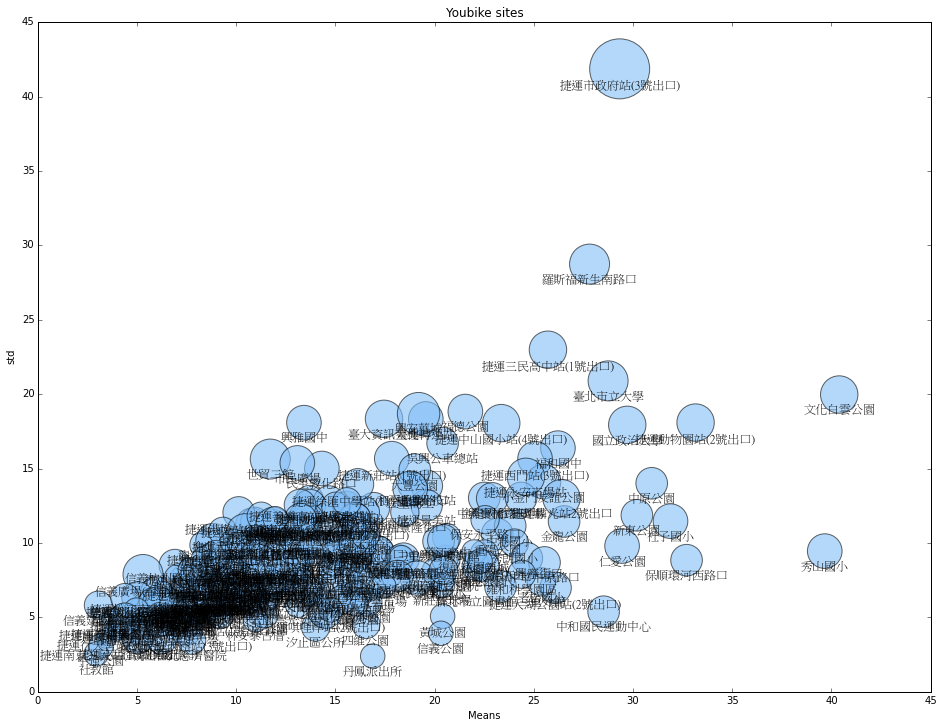

In [16]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"/library/Fonts/Microsoft/PMingLiU.ttf", size=12) 

from scipy import array, stats

fig = plt.figure(1,figsize=(16, 12) ,  facecolor='w')
ax = fig.add_subplot(1, 1, 1)
_x, _y, _c, _size, _label = [], [], [], [], []
for site in site_dict:
    _x.append(numpy.mean(site_dict[site]))
    _y.append(numpy.std(site_dict[site]))
    _label.append(site)
    _c.append('#81BEF7')
    _size.append(site_total[site]/10)
    
ya, xa, ca, sizea = array(_y), array(_x), array(_c), array(_size)
ax.scatter(xa, ya, s=sizea*200, c=ca, alpha=0.6, marker='o', linewidth=1)
for x, y, l in zip(_x, _y, _label):
    plt.annotate(
        l,
        xy=(x, y),
        xytext=(0, -10),
        textcoords='offset points',
        ha='center',
        va='top', 
        fontproperties=font)
ax.set_title("Youbike sites")
ax.set_xlabel('Means')
ax.set_ylabel('std')
plt.show()
plt.close()

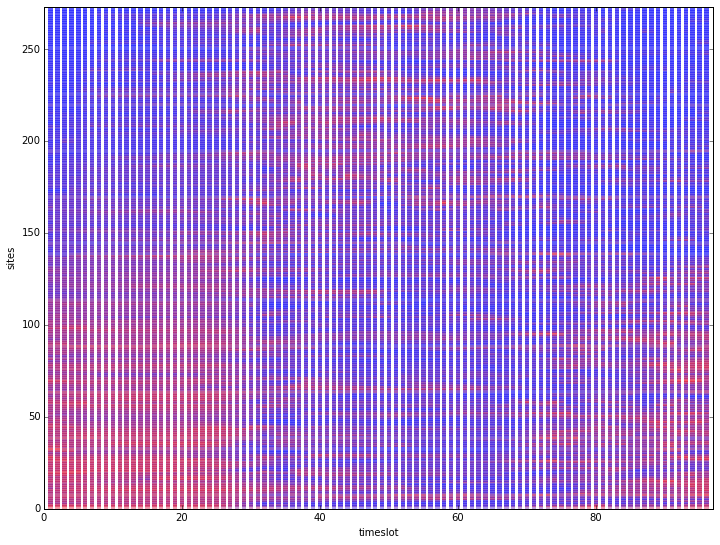

In [32]:
import numpy
import matplotlib.pyplot as plt
# import array
scale_dict = {}
for site, tlist in site_dict.items():
    newlist = numpy.array(tlist).reshape(96, 3)
    nlist = list(newlist)
    scale_dict.setdefault(site, [])
    for n in nlist:
        scale_dict[site].append(numpy.mean(n))
scale_list =  [t for s, t in sorted([(numpy.mean(v[:6]), k) for k, v in scale_dict.items()], reverse=True)]
fig = plt.figure(1,figsize=(12, 9) ,  facecolor='w')
ax = fig.add_subplot(1, 1, 1)
_x, _y, _c, _label = [], [], [], []
y_ctr = 0
for site in scale_list:
    y_ctr += 1
    for i, t in enumerate(scale_dict[site]):
        _x.append(i+1)
        _y.append(y_ctr)
        _c.append(color_red_blue(t/float(site_total[site])))
    _label.append(site)
# ya, xa, ca = array(_y), array(_x), array(_c)
ax.scatter(_x, _y, s=20, c=_c, alpha=0.4, marker='s', linewidth=0)
        
# for x, y, l in zip(_x, _y, _label):
#     plt.annotate(
#         l,
#         xy=(x, y),
#         xytext=(0, 0),
#         textcoords='offset points',
#         ha='left',
#         va='center',
#         fontproperties=font)

ax.set_xlim(0, max(_x)+1)
ax.set_ylim(0, max(_y)+1)
ax.set_xlabel('timeslot')
ax.set_ylabel('sites')
plt.show()
plt.close()

In [ ]:
# import plotly.plotly as py
# from plotly.graph_objs import *
# py.sign_in('jirlong', 'v4w8gftexm')

# trace1 = Scatter(
#     x=_x,
#     y=_y,
#     text = _label,
#     mode='markers',
#     marker=Marker(
#         color=_c,
#         size=_size,
#         opacity=0.6
#     )
# )
# data = Data([trace1])
# layout = Layout(
#     showlegend=True
# )
# fig = Figure(data=data, layout=layout)
# plot_url = py.plot(fig, filename='bubblechart')